In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df = pd.read_csv('Data/train.csv')
X = df.drop(columns=['Id', 'Pawpularity', 'Occlusion'])
y = df[['Occlusion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.head())
print(y_train.head())

print(f'Number of features in X_train: {X_train.shape[1]}')

      Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
2838              0     1     1     1       0          0      0        0   
1225              0     0     1     1       0          0      0        0   
7126              0     1     1     1       0          0      1        0   
1701              0     1     1     1       0          0      0        0   
3214              0     1     1     1       0          0      0        0   

      Human  Info  Blur  
2838      0     0     0  
1225      0     0     0  
7126      0     0     0  
1701      0     0     0  
3214      0     0     0  
      Occlusion
2838          0
1225          0
7126          0
1701          0
3214          0
Number of features in X_train: 11


In [65]:
clf = GaussianNB()
clf.fit(X_train, y_train)

c:\Users\Christian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [66]:
print(clf.class_prior_)
print(clf.theta_)

[0.82862524 0.17137476]
[[0.03279221 0.76915584 0.90275974 0.86331169 0.00909091 0.06964286
  0.12564935 0.04204545 0.05941558 0.04675325 0.07288961]
 [0.         0.79513344 0.91836735 0.85949765 0.00627943 0.04788069
  0.1310832  0.07535322 0.69230769 0.12166405 0.06828885]]


In [67]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.21146085552865213
F1 Score: 0.29480349203307865


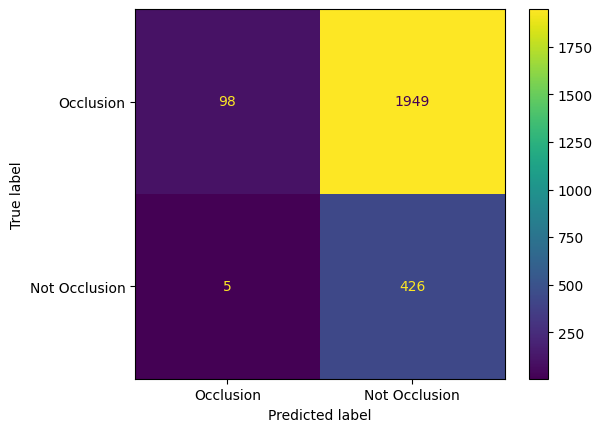

In [68]:
labels = ["Occlusion", "Not Occlusion"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
test_data = pd.read_csv('Data/test.csv')
test_data = test_data.drop(columns=['Id', 'Occlusion'])

results = clf.predict_proba(test_data)

print(results)

KeyError: 1

The numbers returned by predict_proba are the raw probabilities for each class, but they are indeed in a range of [0, 1] (not percentages). The values represent the model's estimated probability of each sample belonging to each class. Here's a more intuitive explanation:

1.00000000e+00 is equivalent to a probability of 100% for class 0, and 0.00000000e+00 means 0% for class 1.
9.99972102e-01 corresponds to approximately 99.9972% for class 1, and 2.78975483e-05 corresponds to about 0.0028% for class 0.